In [1]:
import numpy as np
import glob
import os
import re
import pandas as pd
import warnings
import json
import math

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Preparing Dataset

In [3]:
df = pd.read_csv("./RAW_RESULTS/TRADITIONAL_APPROACHES_SAMPLES.csv")
print(len(df))

df_direct = pd.read_csv("./RAW_RESULTS/DIRECT_UNCERTAINTY_SAMPLES.csv")
print(len(df_direct))

7152
2613


# Create A Boxplot for GED metric with Traditional Approaches.

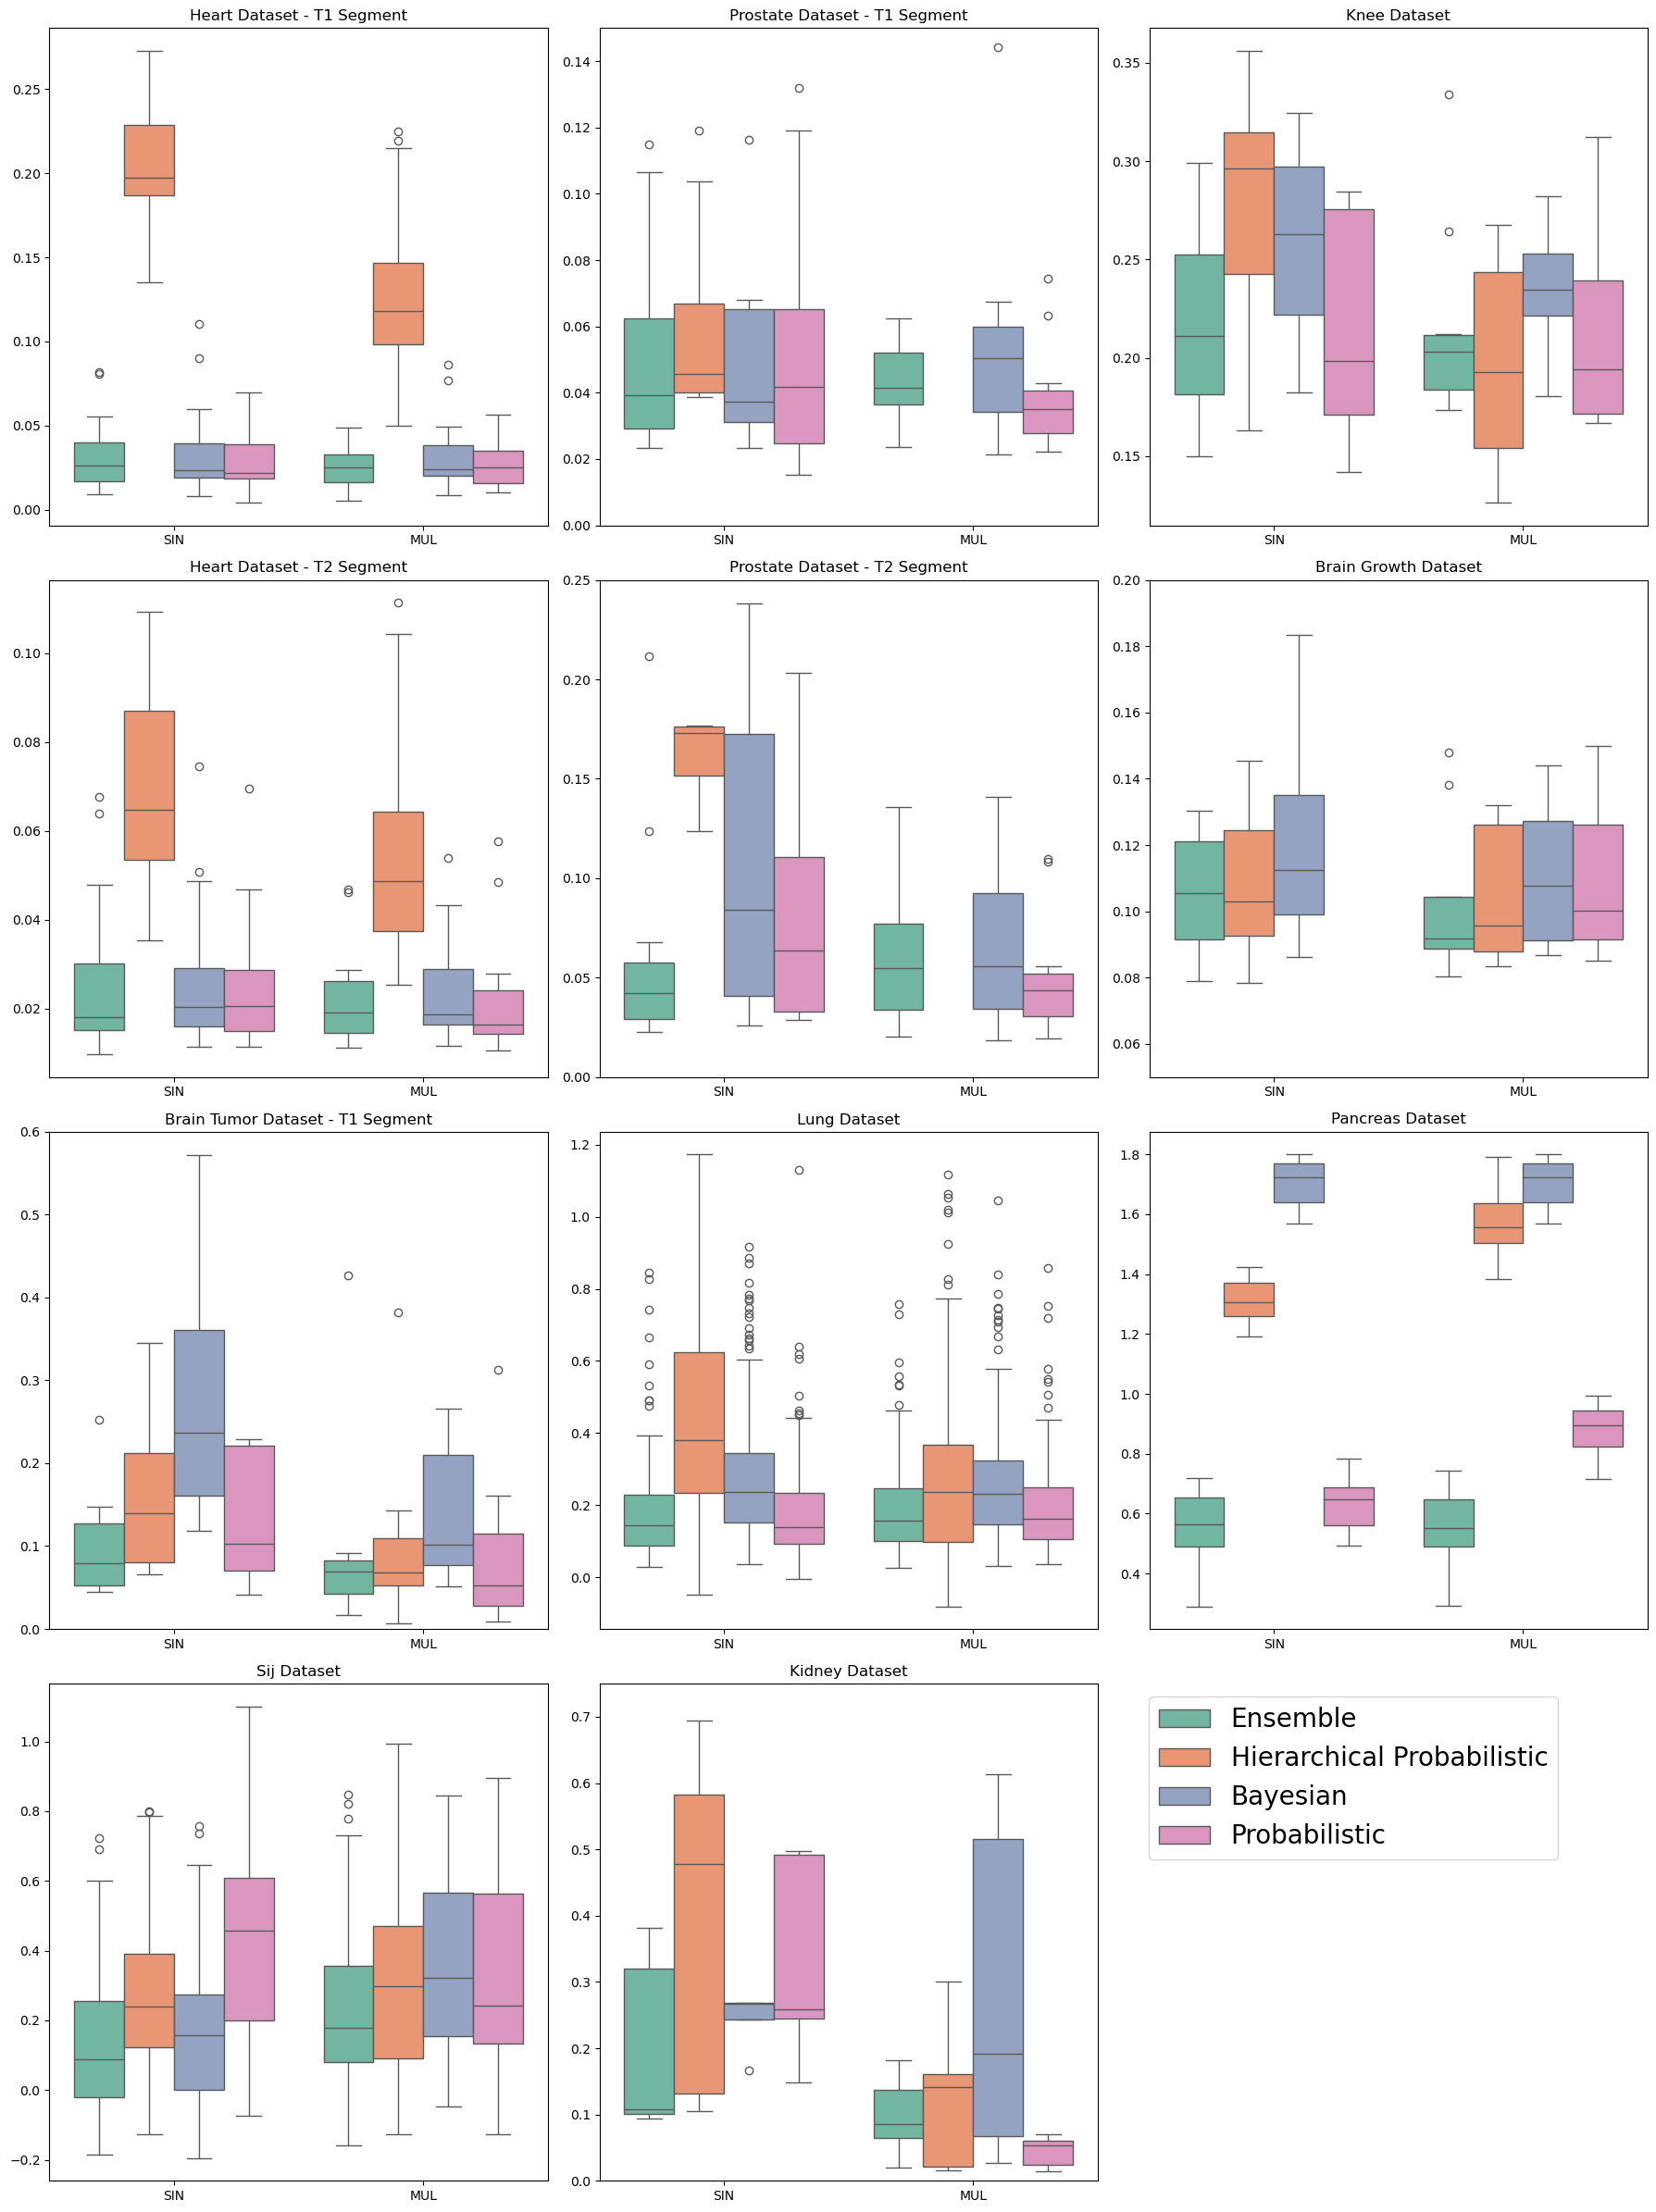

In [4]:
df_boxplot=df[(df["metric"]=="ged")]
datasets = {
    'HEART_TASK1':["Heart Dataset - T1 Segment",[]],
    'HEART_TASK2':["Heart Dataset - T2 Segment",[]],
    'BRAIN_TUMOR_TASK1':["Brain Tumor Dataset - T1 Segment",[0,0.6]],
    'SIJ':["",[]], 
    'PROSTATE_TASK1':["Prostate Dataset - T1 Segment",[0,0.15]], 
    'PROSTATE_TASK2':["Prostate Dataset - T2 Segment",[0,0.25]],
    'LUNG':["",[]],  'KIDNEY':["",[0,0.75]],'KNEE':["",[]],
    'BRAIN_GROWTH':["",[0.05,0.2]], 'PANCREAS':["",[]]
}

# Set up the subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 24),constrained_layout=True)
# axes = axes.flatten()

# Create a boxplot for each metric
for index, dataset in enumerate(datasets.keys()):
    
    if dataset.startswith("HEART"):
        segment=("LUNGS" if dataset.endswith("TASK1") else "HEART")
        df_draw=df_boxplot[
            (df_boxplot["dataset"]=="HEART") & 
            (df_boxplot["segment"]==segment)
        ]
    else:
        df_draw=df_boxplot[(df_boxplot["dataset"]==dataset)]
        
    title =datasets[dataset][0] if len(datasets[dataset][0])>0 else dataset.replace("_"," ") + " Dataset"

    # print(np.unique(df_draw["segment"]))
    
    j = int(index / 4)
    i = index % 4
        
        
    sns.boxplot(data=df_draw,x="type",y="result",hue="model", palette="Set2",ax=axes[i][j])

    axes[i][j].set_title(f"{title.title()}")
    axes[i][j].set_xlabel("")
    axes[i][j].set_ylabel("")
    
    if len(datasets[dataset][1]) == 2:
        axes[i][j].set_ylim(*datasets[dataset][1])
    
    # if index!=len(datasets)-1:
    axes[i][j].legend_.remove()


# fig.suptitle("Result of GED Metric Based on Each Dataset", fontsize=18, y=1)
# Hide any unused subplots

for iy, ix in np.ndindex(axes.shape):
    if not axes[iy, ix].has_data():
        axes[iy, ix].axis("off")
        
handles, labels = axes[0][0].get_legend_handles_labels()

labels = [label.replace("_"," ").capitalize() if label!="hier_probabilistic" else "Hierarchical Probabilistic" for label in labels]
# Add a single, shared legend for the whole figure
fig.legend(
    handles, labels,
    loc="lower center",  # Options: 'upper right', 'lower left', 'center right', etc.
    bbox_to_anchor=(0.815, 0.155),  # x, y: 0.5 is centered; y negative puts it below
    # ncol=len(labels),
    frameon=True,
    fontsize=20
)
    

plt.tight_layout()
plt.show()


# Create A Boxplot for A-DICE metric with Traditional Approaches.

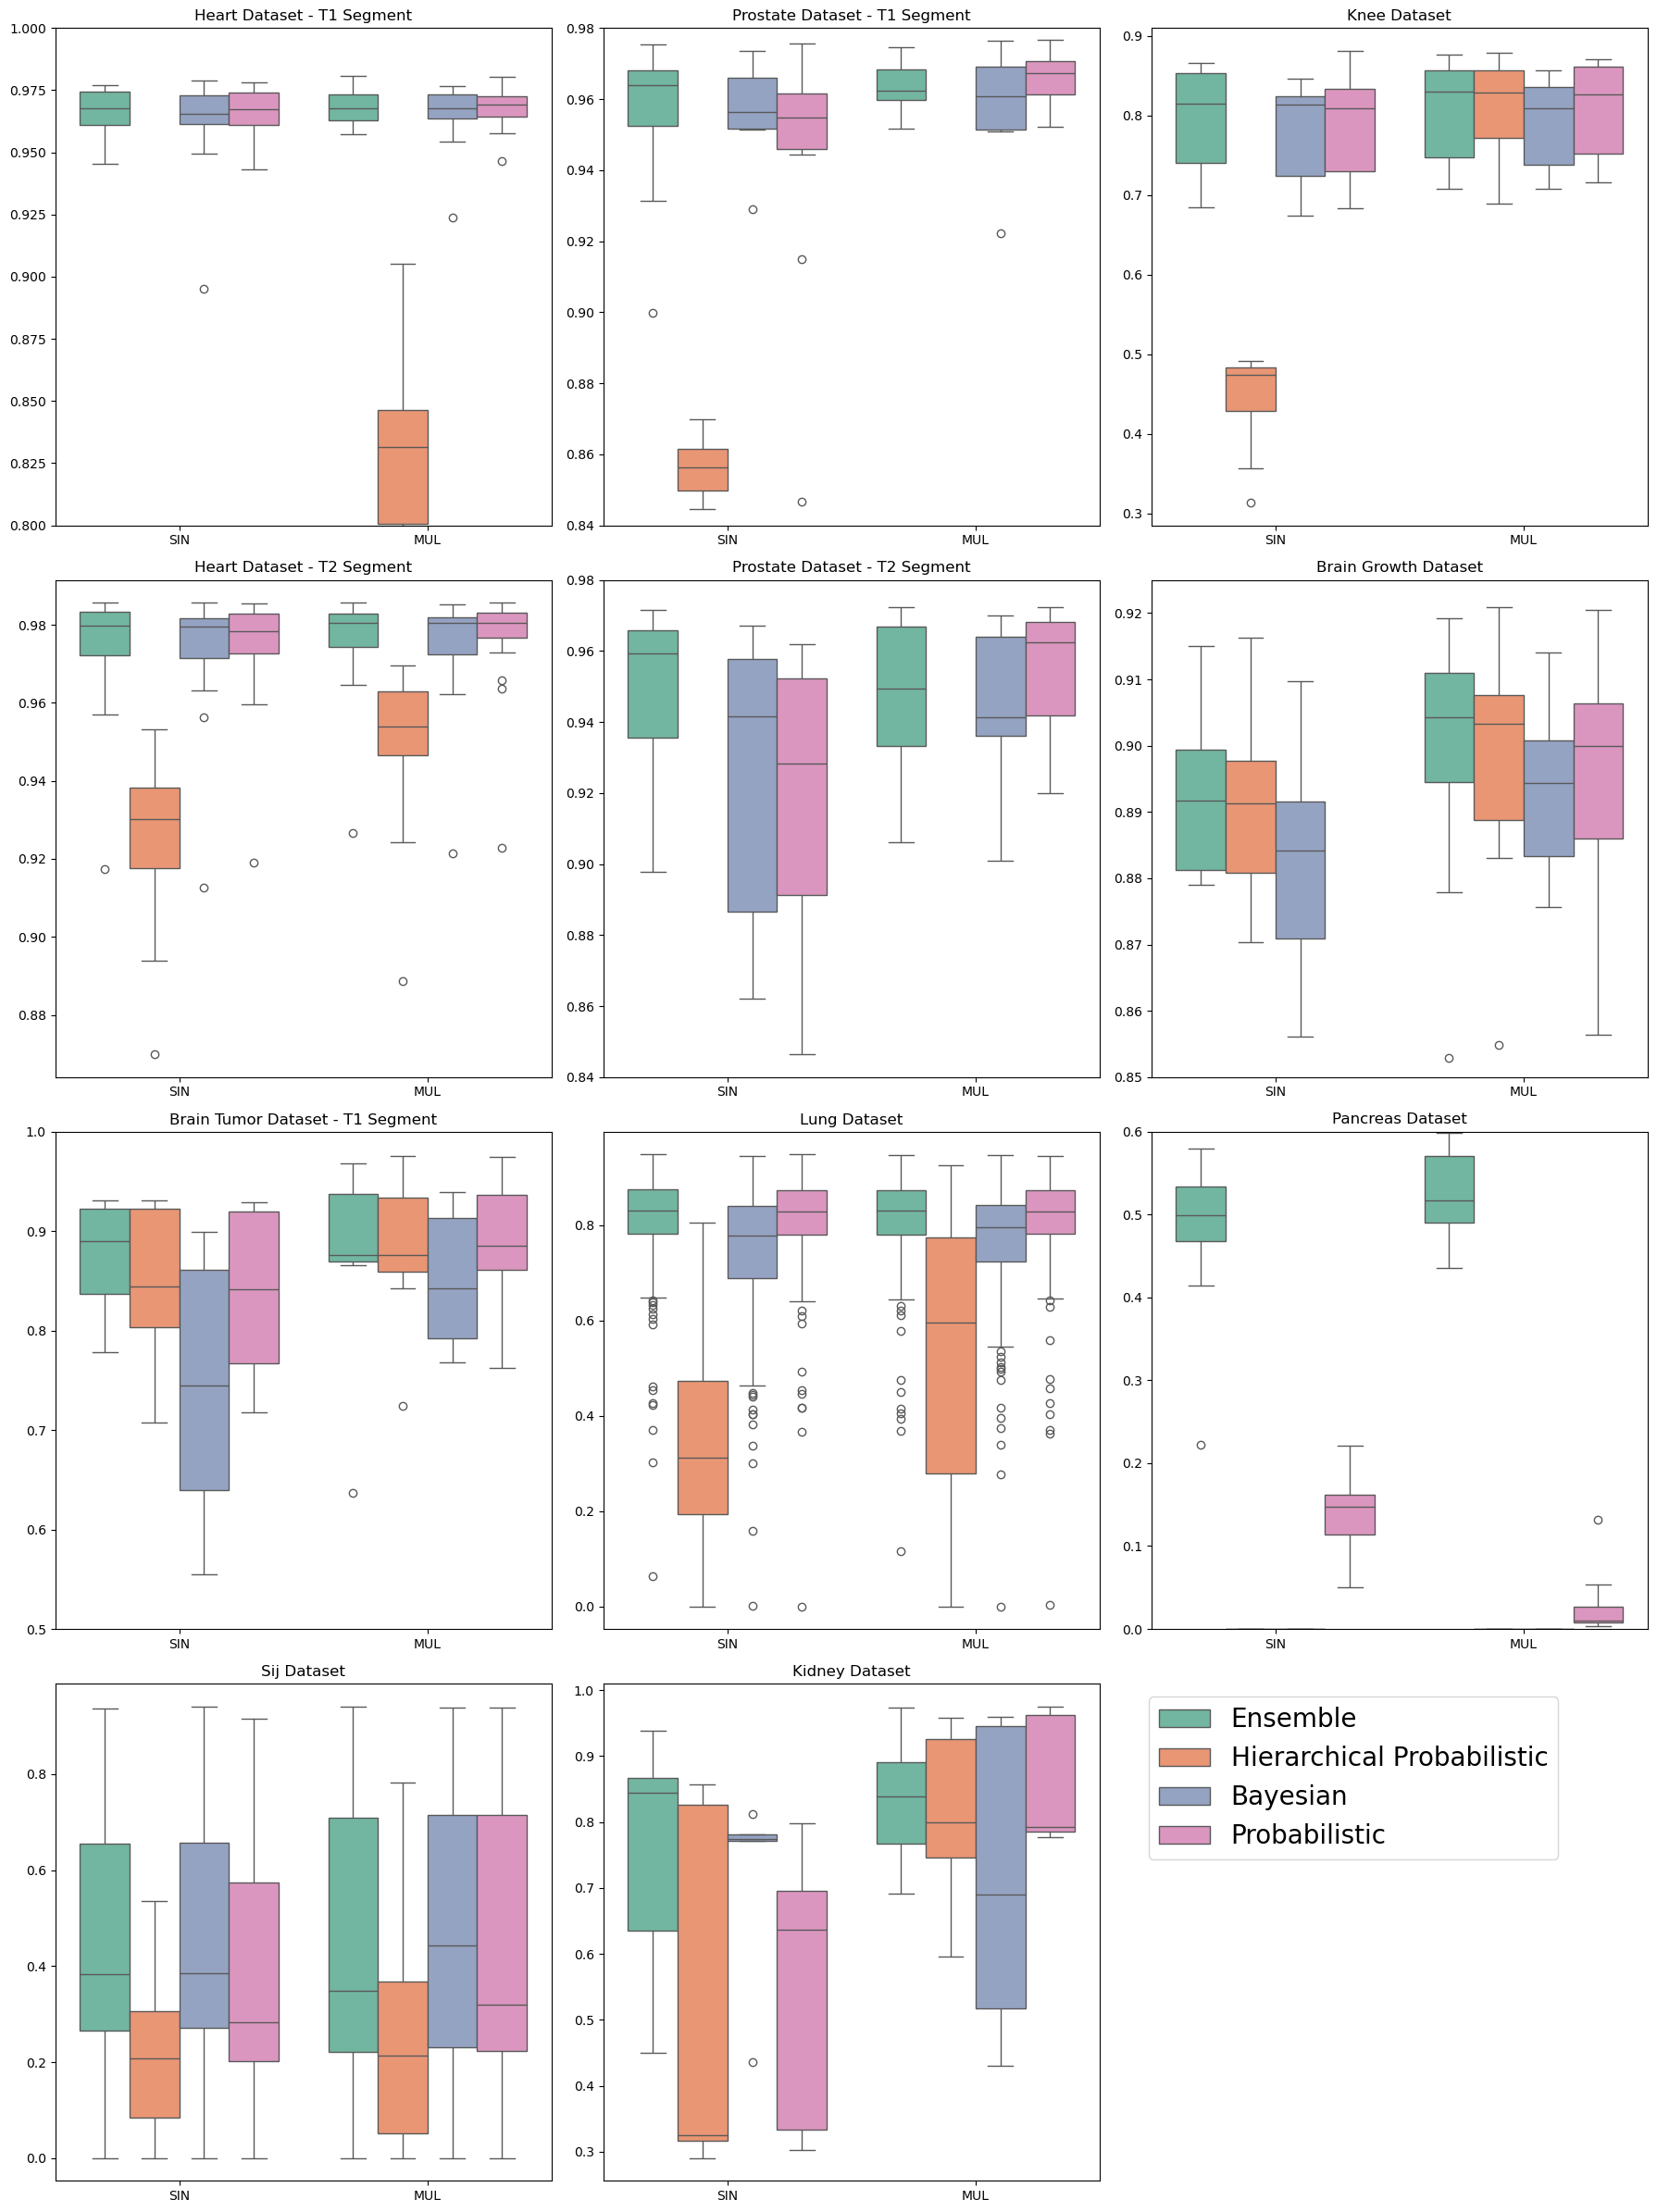

In [5]:
df_boxplot=df[(df["metric"]=="dice")]
datasets = {
    'HEART_TASK1':["Heart Dataset - T1 Segment",[0.8,1]],
    'HEART_TASK2':["Heart Dataset - T2 Segment",[]],
    'BRAIN_TUMOR_TASK1':["Brain Tumor Dataset - T1 Segment",[0.5,1]],
    'SIJ':["",[]], 
    'PROSTATE_TASK1':["Prostate Dataset - T1 Segment",[0.84,0.98]], 
    'PROSTATE_TASK2':["Prostate Dataset - T2 Segment",[0.84,0.98]],
    'LUNG':["",[]],  'KIDNEY':["",[]],'KNEE':["",[]],
    'BRAIN_GROWTH':["",[0.85,0.925]], 'PANCREAS':["",[0,0.6]]
}

# Set up the subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 24),constrained_layout=True)
# axes = axes.flatten()

# Create a boxplot for each metric
for index, dataset in enumerate(datasets.keys()):
    
    if dataset.startswith("HEART"):
        segment=("LUNGS" if dataset.endswith("TASK1") else "HEART")
        df_draw=df_boxplot[
            (df_boxplot["dataset"]=="HEART") & 
            (df_boxplot["segment"]==segment)
        ]
    else:
        df_draw=df_boxplot[(df_boxplot["dataset"]==dataset)]
        
    title =datasets[dataset][0] if len(datasets[dataset][0])>0 else dataset.replace("_"," ") + " Dataset"

    # print(np.unique(df_draw["segment"]))
    
    j = int(index / 4)
    i = index % 4
        
        
    sns.boxplot(data=df_draw,x="type",y="result",hue="model", palette="Set2",ax=axes[i][j])

    axes[i][j].set_title(f"{title.title()}")
    axes[i][j].set_xlabel("")
    axes[i][j].set_ylabel("")
    
    if len(datasets[dataset][1]) == 2:
        axes[i][j].set_ylim(*datasets[dataset][1])
    
    # if index!=len(datasets)-1:
    axes[i][j].legend_.remove()


# fig.suptitle("Result of DICE Metric Based on Each Dataset", fontsize=18, y=1)
# Hide any unused subplots

for iy, ix in np.ndindex(axes.shape):
    if not axes[iy, ix].has_data():
        axes[iy, ix].axis("off")
        
handles, labels = axes[0][0].get_legend_handles_labels()

labels = [label.replace("_"," ").capitalize() if label!="hier_probabilistic" else "Hierarchical Probabilistic" for label in labels]
# Add a single, shared legend for the whole figure
fig.legend(
    handles, labels,
    loc="lower center",  # Options: 'upper right', 'lower left', 'center right', etc.
    bbox_to_anchor=(0.815, 0.155),  # x, y: 0.5 is centered; y negative puts it below
    # ncol=len(labels),
    frameon=True,
    fontsize=20
)
    

plt.tight_layout()
plt.show()

# Create A Boxplot for DICE metric for DIRECT UNCERTAINTY Approaches for Orignal Segment.

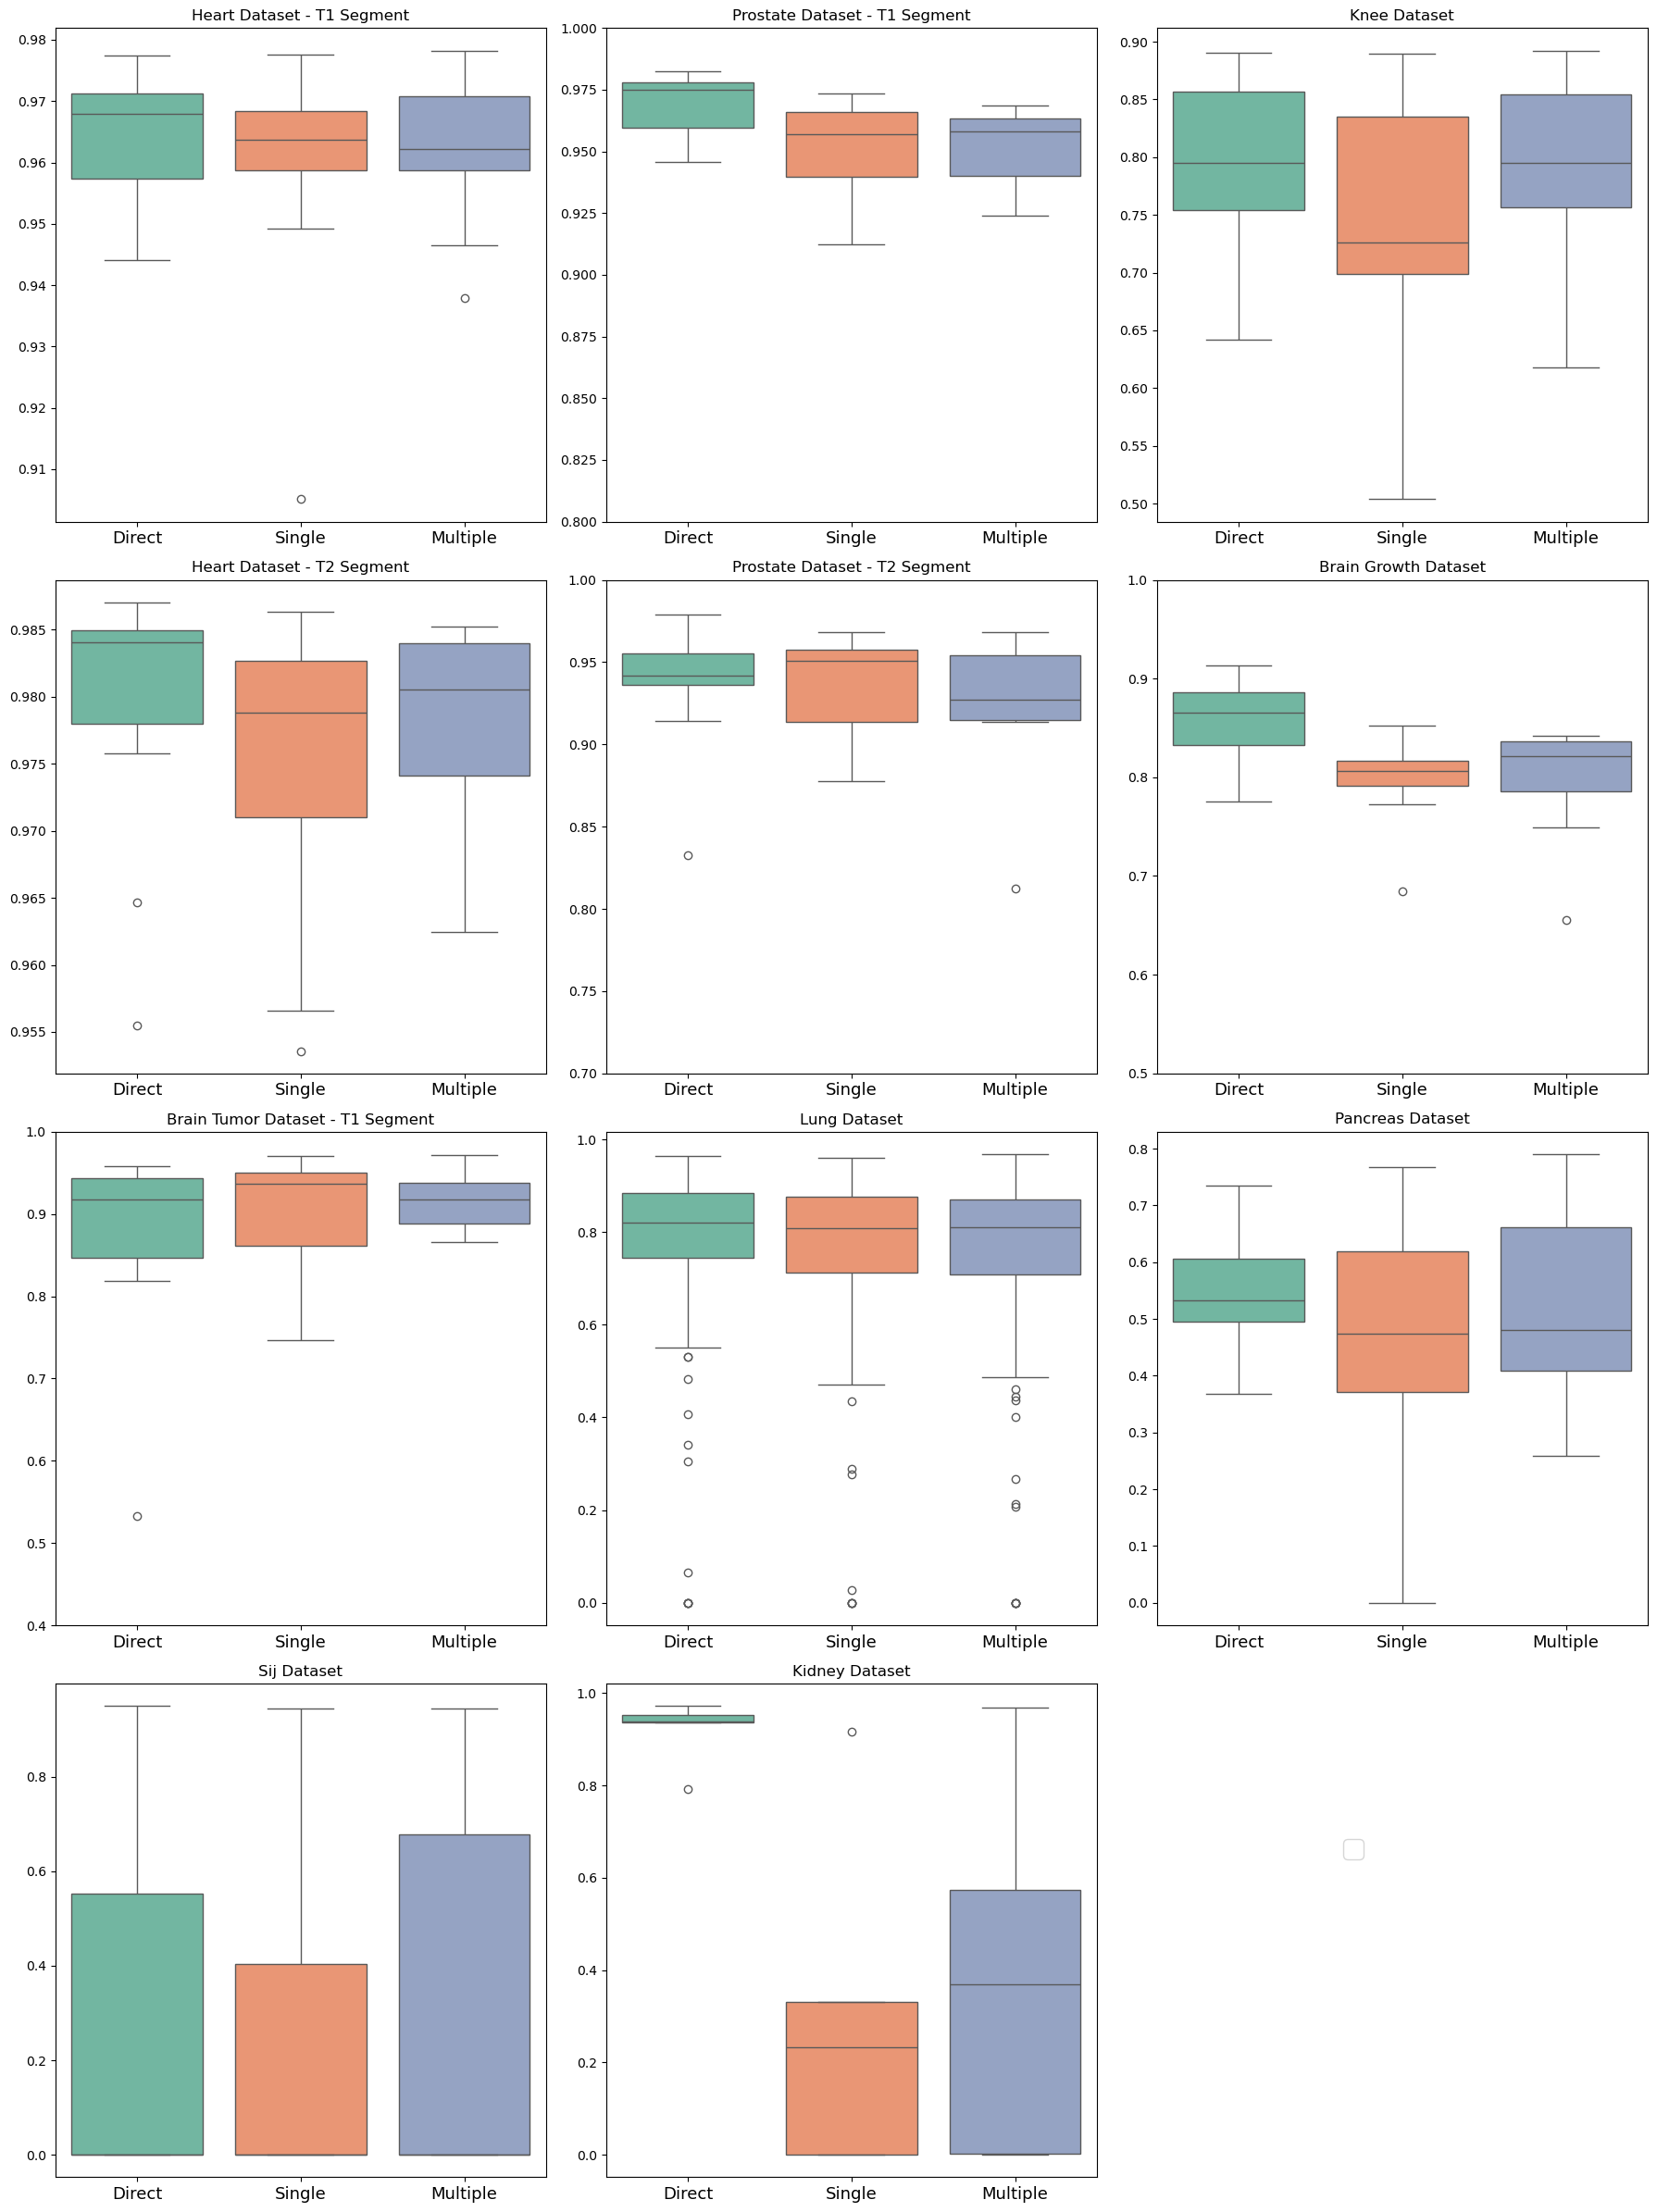

In [7]:
df_boxplot=df_direct[(df_direct["metric"]=="ndice") & (df_direct["segment"]!="UNCERTAINTY") & (df_direct["type"].isin(['DIR', 'DMU', 'DSI']))]
datasets = {
    'HEART_TASK1':["Heart Dataset - T1 Segment",[]],
    'HEART_TASK2':["Heart Dataset - T2 Segment",[]],
    'BRAIN_TUMOR_TASK1':["Brain Tumor Dataset - T1 Segment",[0.4,1]],
    'SIJ':["",[]], 
    'PROSTATE_TASK1':["Prostate Dataset - T1 Segment",[0.8,1]], 
    'PROSTATE_TASK2':["Prostate Dataset - T2 Segment",[0.7,1]],
    'LUNG':["",[]],  'KIDNEY':["",[]],'KNEE':["",[]],
    'BRAIN_GROWTH':["",[0.5,1]], 'PANCREAS':["",[]]
}

# Set up the subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 24),constrained_layout=True)
# axes = axes.flatten()

# Create a boxplot for each metric
for index, dataset in enumerate(datasets.keys()):
    
    if dataset.startswith("HEART"):
        segment=("LUNGS" if dataset.endswith("TASK1") else "HEART")
        df_draw=df_boxplot[
            (df_boxplot["dataset"]=="HEART") & 
            (df_boxplot["segment"]==segment)
        ]
    else:
        df_draw=df_boxplot[(df_boxplot["dataset"]==dataset)]
        
    title =datasets[dataset][0] if len(datasets[dataset][0])>0 else dataset.replace("_"," ") + " Dataset"

    # print(np.unique(df_draw["segment"]))
    
    j = int(index / 4)
    i = index % 4
        
        
    xvalues = ["Label 1", "Label 2", "Label 3", "Label 4", "Label 5"]
    sns.boxplot(data=df_draw,x="type",y="result",hue="type", palette="Set2",ax=axes[i][j])

    axes[i][j].set_title(f"{title.title()}")
    axes[i][j].set_xlabel("")
    axes[i][j].set_ylabel("")
    axes[i][j].set_xticklabels(["Direct","Single","Multiple"],rotation=0,fontsize=13)
    
    if len(datasets[dataset][1]) == 2:
        axes[i][j].set_ylim(*datasets[dataset][1])
    


# fig.suptitle("Result of DICE Metric Based on Each Dataset", fontsize=18, y=1)
# Hide any unused subplots

for iy, ix in np.ndindex(axes.shape):
    if not axes[iy, ix].has_data():
        axes[iy, ix].axis("off")
        
handles, labels = axes[0][0].get_legend_handles_labels()

labels = [label.replace("_"," ").capitalize() if label!="hier_probabilistic" else "Hierarchical Probabilistic" for label in labels]
# Add a single, shared legend for the whole figure
fig.legend(
    handles, labels,
    loc="lower center",  # Options: 'upper right', 'lower left', 'center right', etc.
    bbox_to_anchor=(0.815, 0.155),  # x, y: 0.5 is centered; y negative puts it below
    # ncol=len(labels),
    frameon=True,
    fontsize=20
)
    

plt.tight_layout()
plt.show()

# Create A Boxplot for DICE metric for DIRECT UNCERTAINTY Approaches for Uncertainty Segment.

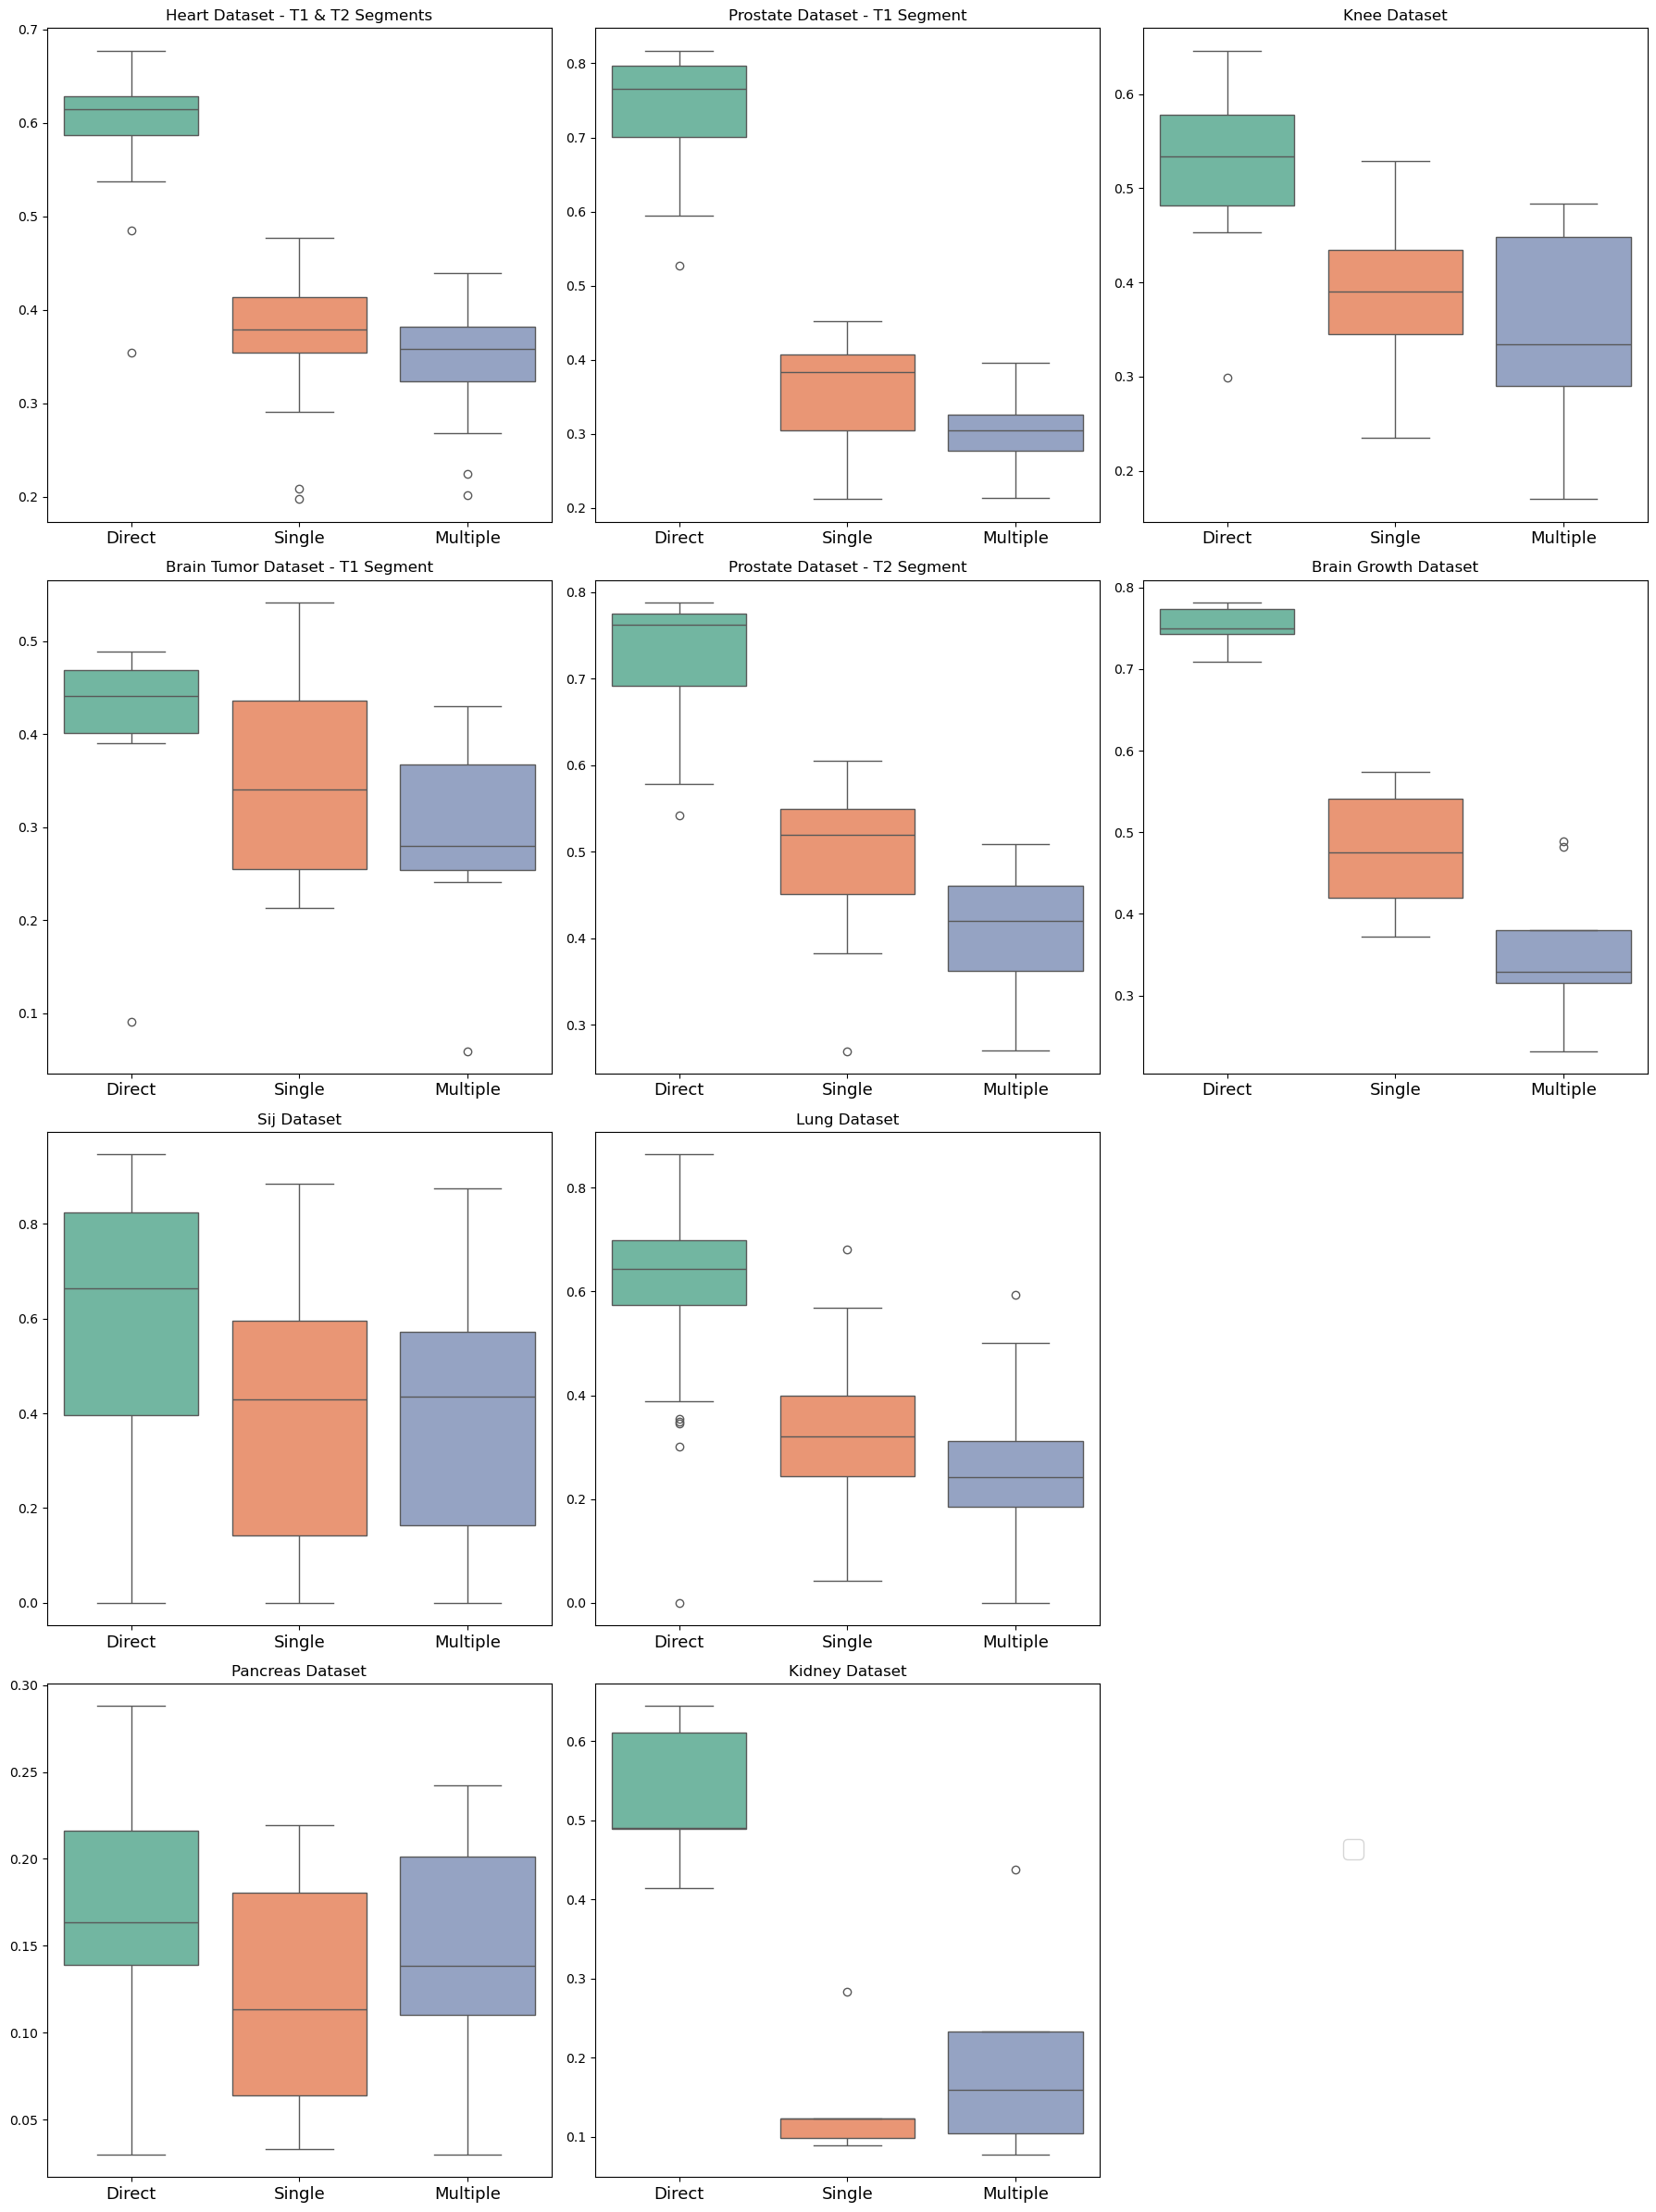

In [8]:
df_boxplot=df_direct[(df_direct["metric"]=="ndice") & (df_direct["segment"]=="UNCERTAINTY") & (df_direct["type"].isin(['DIR', 'DMU', 'DSI']))]
datasets = {
    'HEART':["Heart Dataset - T1 & T2 Segments",[]],
    'BRAIN_TUMOR_TASK1':["Brain Tumor Dataset - T1 Segment",[]],
    'SIJ':["",[]],
    'PANCREAS':["",[]], 
    'PROSTATE_TASK1':["Prostate Dataset - T1 Segment",[]], 
    'PROSTATE_TASK2':["Prostate Dataset - T2 Segment",[]],
    'LUNG':["",[]],  
    'KIDNEY':["",[]],
    'KNEE':["",[]],
    'BRAIN_GROWTH':["",[]]
}

# Set up the subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 24),constrained_layout=True)
# axes = axes.flatten()

# Create a boxplot for each metric
for index, dataset in enumerate(datasets.keys()):
    
    
    df_draw=df_boxplot[(df_boxplot["dataset"]==dataset)]
        
    title =datasets[dataset][0] if len(datasets[dataset][0])>0 else dataset.replace("_"," ") + " Dataset"
    
    j = int(index / 4)
    i = index % 4
                
    sns.boxplot(data=df_draw,x="type",y="result",hue="type", palette="Set2",ax=axes[i][j])

    axes[i][j].set_title(f"{title.title()}")
    axes[i][j].set_xlabel("")
    axes[i][j].set_ylabel("")
    axes[i][j].set_xticklabels(["Direct","Single","Multiple"],rotation=0,fontsize=13)
    
    if len(datasets[dataset][1]) == 2:
        axes[i][j].set_ylim(*datasets[dataset][1])

# fig.suptitle("Result of DICE Metric Based on Each Dataset", fontsize=18, y=1)
# Hide any unused subplots

for iy, ix in np.ndindex(axes.shape):
    if not axes[iy, ix].has_data():
        axes[iy, ix].axis("off")
        
handles, labels = axes[0][0].get_legend_handles_labels()

labels = [label.replace("_"," ").capitalize() if label!="hier_probabilistic" else "Hierarchical Probabilistic" for label in labels]
# Add a single, shared legend for the whole figure
fig.legend(
    handles, labels,
    loc="lower center",
    bbox_to_anchor=(0.815, 0.155),
    # ncol=len(labels),
    frameon=True,
    fontsize=20
)

plt.tight_layout()
plt.show()